<a href="https://colab.research.google.com/github/NicoPatalagua/Pandas/blob/master/Ejemplos_RegresionLineal_Multiple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np

In [0]:
data = pd.read_csv("articulos_ml.csv")

In [6]:
data.shape

(161, 8)

In [7]:
data.tail()

,Title,url,Word count,# of Links,# of comments,# Images video,Elapsed days,# Shares
156,[Log] 83: How Google Uses Machine Learning And...,[Log] 83: http://feedproxy.google.com/~r/Techc...,3239,3,11.0,1,84,3239
157,[Log] 84: Zuck Knows If You've Been Bad Or Goo...,[Log] 84: http://feedproxy.google.com/~r/Techc...,2566,3,8.0,4,85,25019
158,[Log] 85: Microsoft Improves Windows Phone Voi...,[Log] 85: http://feedproxy.google.com/~r/Techc...,2089,4,4.0,1,86,49614
159,[Log] 86: How Google's Acquisition Of DNNresea...,[Log] 86: http://feedproxy.google.com/~r/Techc...,1530,4,12.0,3,87,33660
160,[Log] 87: Google's Cloud Is Eating Apple's Lunch,[Log] 87: http://feedproxy.google.com/~r/Techc...,953,6,13.0,2,88,5956


In [8]:
data.describe()

,Word count,# of Links,# of comments,# Images video,Elapsed days,# Shares
count,161.000000,161.000000,129.000000,161.000000,161.000000,161.000000
mean,1808.260870,9.739130,8.782946,3.670807,98.124224,27948.347826
std,1141.919385,47.271625,13.142822,3.418290,114.337535,43408.006839
min,250.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,990.000000,3.000000,2.000000,1.000000,31.000000,2800.000000
50%,1674.000000,5.000000,6.000000,3.000000,62.000000,16458.000000
75%,2369.000000,7.000000,12.000000,5.000000,124.000000,35691.000000
max,8401.000000,600.000000,104.000000,22.000000,1002.000000,350000.000000


In [9]:
# Predecir la cantidad de Shares (variable dependiente)
# teniendo como parámetros (variables independientes) la cantidad de palabras en el artículo
# y la cantidad de imágenes y videos dentro de él

x_y_data = data[["Word count", '# Images video']].fillna(0)

x_y_data.head()

,Word count,# Images video
0,1888,2
1,1742,9
2,962,1
3,1221,2
4,2039,4


In [10]:
data['# Shares'].head()

0    200000
1     25000
2     42000
3    200000
4    200000
Name: # Shares, dtype: int64

In [0]:
# z = m*x + m*y + b
x_y_train_data = np.array(x_y_data)
z_train_data = data['# Shares'].values

In [0]:
from sklearn.linear_model import LinearRegression # Se importa el modelo de regresión lineal

In [0]:
# Se instancia LinearRegression (funciona para regresión lineal simple y múltiple)
multiple_linear_regression = LinearRegression()

In [14]:
# Se 'entrena' el modelo
multiple_linear_regression.fit(x_y_train_data, z_train_data)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [15]:
print(multiple_linear_regression.coef_) # Imprime el coeficiente (la pendiente m) de cada recta

[  5.46782479 -57.62514909]


In [16]:
print(multiple_linear_regression.intercept_) # Imprime la intersección (valor b)

18272.62503864113


In [17]:
x = multiple_linear_regression.coef_[0]
y = multiple_linear_regression.coef_[1]
b = multiple_linear_regression.intercept_
print("z = {}*x + {}*y + {}".format(round(x, 2), round(y, 2), round(b, 2))) # Función del ajuste 

z = 5.47*x + -57.63*y + 18272.63


In [18]:
model_accuracy = multiple_linear_regression.score(x_y_train_data, z_train_data) # Calculamos la precisión del modelo

print("Precisión del modelo: {}%".format(round(model_accuracy * 100, 2)))

Precisión del modelo: 2.01%


In [0]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

Text(0.5, 0.92, 'Regresión Lineal con Múltiples Variables')

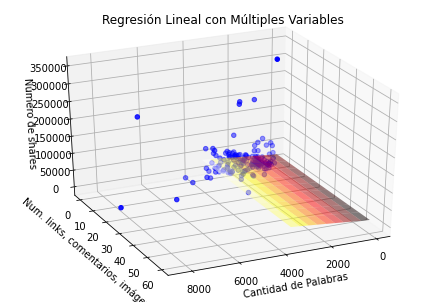

In [20]:
fig = plt.figure()
ax = Axes3D(fig)
 
# Creamos una malla, sobre la cual graficaremos el plano
xx, yy = np.meshgrid(np.linspace(0, 3500, num=10), np.linspace(0, 60, num=10))
 
# calculamos los valores del plano para los puntos x e y
nuevoX = (multiple_linear_regression.coef_[0] * xx)
nuevoY = (multiple_linear_regression.coef_[1] * yy) 
 
# calculamos los correspondientes valores para z. Debemos sumar el punto de intercepción
z = (nuevoX + nuevoY + multiple_linear_regression.intercept_)
 
# Graficamos el plano
ax.plot_surface(xx, yy, z, alpha=.5, cmap='hot')
 
# Graficamos en azul los puntos en 3D
ax.scatter(x_y_train_data[:, 0], x_y_train_data[:, 1], z_train_data, c='blue')
 
# con esto situamos la "camara" con la que visualizamos
ax.view_init(elev=30., azim=65)
        
ax.set_xlabel('Cantidad de Palabras')
ax.set_ylabel('Num. links, comentarios, imágenes')
ax.set_zlabel('Número de shares')
ax.set_title('Regresión Lineal con Múltiples Variables')

In [21]:
### Ahora tomando más de 2 variables independientes

# Se crea un DataFrame para almacenar nuestras variables independientes
x1_x2_x3_x4_data = data[["Word count", "# of Links", '# of comments', '# Images video']].fillna(0)

x1_x2_x3_x4_data.head()

,Word count,# of Links,# of comments,# Images video
0,1888,1,2.0,2
1,1742,9,0.0,9
2,962,6,0.0,1
3,1221,3,0.0,2
4,2039,1,104.0,4


In [0]:
# z = m*x1 + m*x2 + m*x3 + m*x4 + b
x1_x2_x3_x4_train_data = np.array(x1_x2_x3_x4_data)
z_train_data = data['# Shares'].values

In [0]:
# Se instancia LinearRegression (funciona para regresión lineal simple y múltiple)
multiple_linear_regression = LinearRegression()

In [24]:
# Se 'entrena' el modelo
multiple_linear_regression.fit(x1_x2_x3_x4_train_data, z_train_data)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [25]:
print(multiple_linear_regression.coef_) # Imprime el coeficiente (la pendiente m) de cada recta

[-2.55598092e-01  2.39715683e+02  8.57453250e+02  8.60096131e+02]


In [26]:
print(multiple_linear_regression.intercept_) # Imprime la intersección (valor b)

16884.538738327596


In [27]:
model_accuracy = multiple_linear_regression.score(x1_x2_x3_x4_train_data, z_train_data) # Calculamos la precisión del modelo

print("Precisión del modelo: {}%".format(round(model_accuracy * 100, 2)))

Precisión del modelo: 14.39%


In [28]:
# Pongamos a prueba el modelo

# Vamos a predecir cuántos Shares obtendremos por un artículo con:
# 2000 palabras, 10 links, 4 comentarios, 6 imágenes 

#   [palabras, links, comentarios, imágenes/videos]
x1_x2_x3_x4_test_data = [[2000, 20, 4, 6]]

# Hacemos la predicción
z_prediction = multiple_linear_regression.predict(x1_x2_x3_x4_test_data)

print("Total shares {}".format(int(z_prediction)))

Total shares 29758
